In [1]:
import pickle as pkl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fattpkl = 'num_head_sweep_stratified_metrics.pkl'
sattpkl = 'transformer_stratified_metrics_df.pkl'
pbfdpkl = 'protbert_bfd_metrics_df.pkl'
grempkl = 'gremlin_stratified_metric_df.pkl'

with open(grempkl, 'rb') as f:
    grem_df = pkl.load(f)
with open(fattpkl, 'rb') as f:
    fatt_df = pkl.load(f)
with open(sattpkl, 'rb') as f:
    satt_df = pkl.load(f)
with open(pbfdpkl, 'rb') as f:
    pbfd_df = pkl.load(f)

In [37]:
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.serif": ["Times"],
    "font.size": 14,
})


In [32]:
full_df = pd.concat([grem_df, fatt_df[fatt_df['num_attention_heads'] == 256], satt_df, pbfd_df])


In [33]:
pbfd_df

,sweep_name,pdb,pdb_idx,msa_length,num_seqs,run_state,pr_at_L,pr_at_L_apc,pr_at_L_5,pr_at_L_5_apc,...,medium_auc,medium_pr_at_l,medium_pr_at_l_2,medium_pr_at_l_5,medium_pr_at_l_10,long_auc,long_pr_at_l,long_pr_at_l_2,long_pr_at_l_5,long_pr_at_l_10
0,protbert_bfd,2w3o_1_A,747,100.0,17351.0,finished,0.750000,0.750000,0.800000,0.850000,...,0.717190,0.590000,0.720000,0.850000,0.900000,0.559940,0.360000,0.540000,0.750000,1.000000
1,protbert_bfd,1eqz_1_B,746,108.0,4997.0,finished,0.175926,0.166667,0.171875,0.187500,...,0.212649,0.157407,0.259259,0.190476,0.300000,0.221952,0.120370,0.203704,0.333333,0.400000
2,protbert_bfd,3no0_1_A,745,276.0,9408.0,finished,0.630435,0.641304,0.757576,0.763636,...,0.430794,0.300725,0.384058,0.618182,0.814815,0.741899,0.565217,0.768116,0.909091,0.925926
3,protbert_bfd,1xju_1_A,744,156.0,2110.0,finished,0.314103,0.320513,0.397849,0.408602,...,0.325722,0.198718,0.307692,0.451613,0.600000,0.393210,0.294872,0.371795,0.516129,0.533333
4,protbert_bfd,4ew5_1_B,743,97.0,2254.0,finished,0.226804,0.268041,0.241379,0.258621,...,0.211365,0.144330,0.229167,0.368421,0.111111,0.018799,0.051546,0.020833,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,protbert_bfd,1zli_1_A,4,306.0,2169.0,finished,0.532680,0.522876,0.677596,0.655738,...,0.360417,0.202614,0.307190,0.508197,0.800000,0.649547,0.500000,0.607843,0.868852,0.833333
719,protbert_bfd,1u3j_1_B,3,99.0,1167.0,finished,0.444444,0.484848,0.525424,0.559322,...,0.506833,0.323232,0.530612,0.736842,0.666667,0.438684,0.343434,0.428571,0.526316,0.555556
720,protbert_bfd,1rkt_1_B,2,200.0,24747.0,finished,0.545000,0.545000,0.641667,0.633333,...,0.399482,0.210000,0.350000,0.650000,0.850000,0.543351,0.390000,0.520000,0.700000,0.800000
721,protbert_bfd,3eud_1_A,1,99.0,22284.0,finished,0.525253,0.494949,0.593220,0.627119,...,0.450869,0.353535,0.428571,0.578947,0.666667,0.397973,0.303030,0.448980,0.473684,0.444444


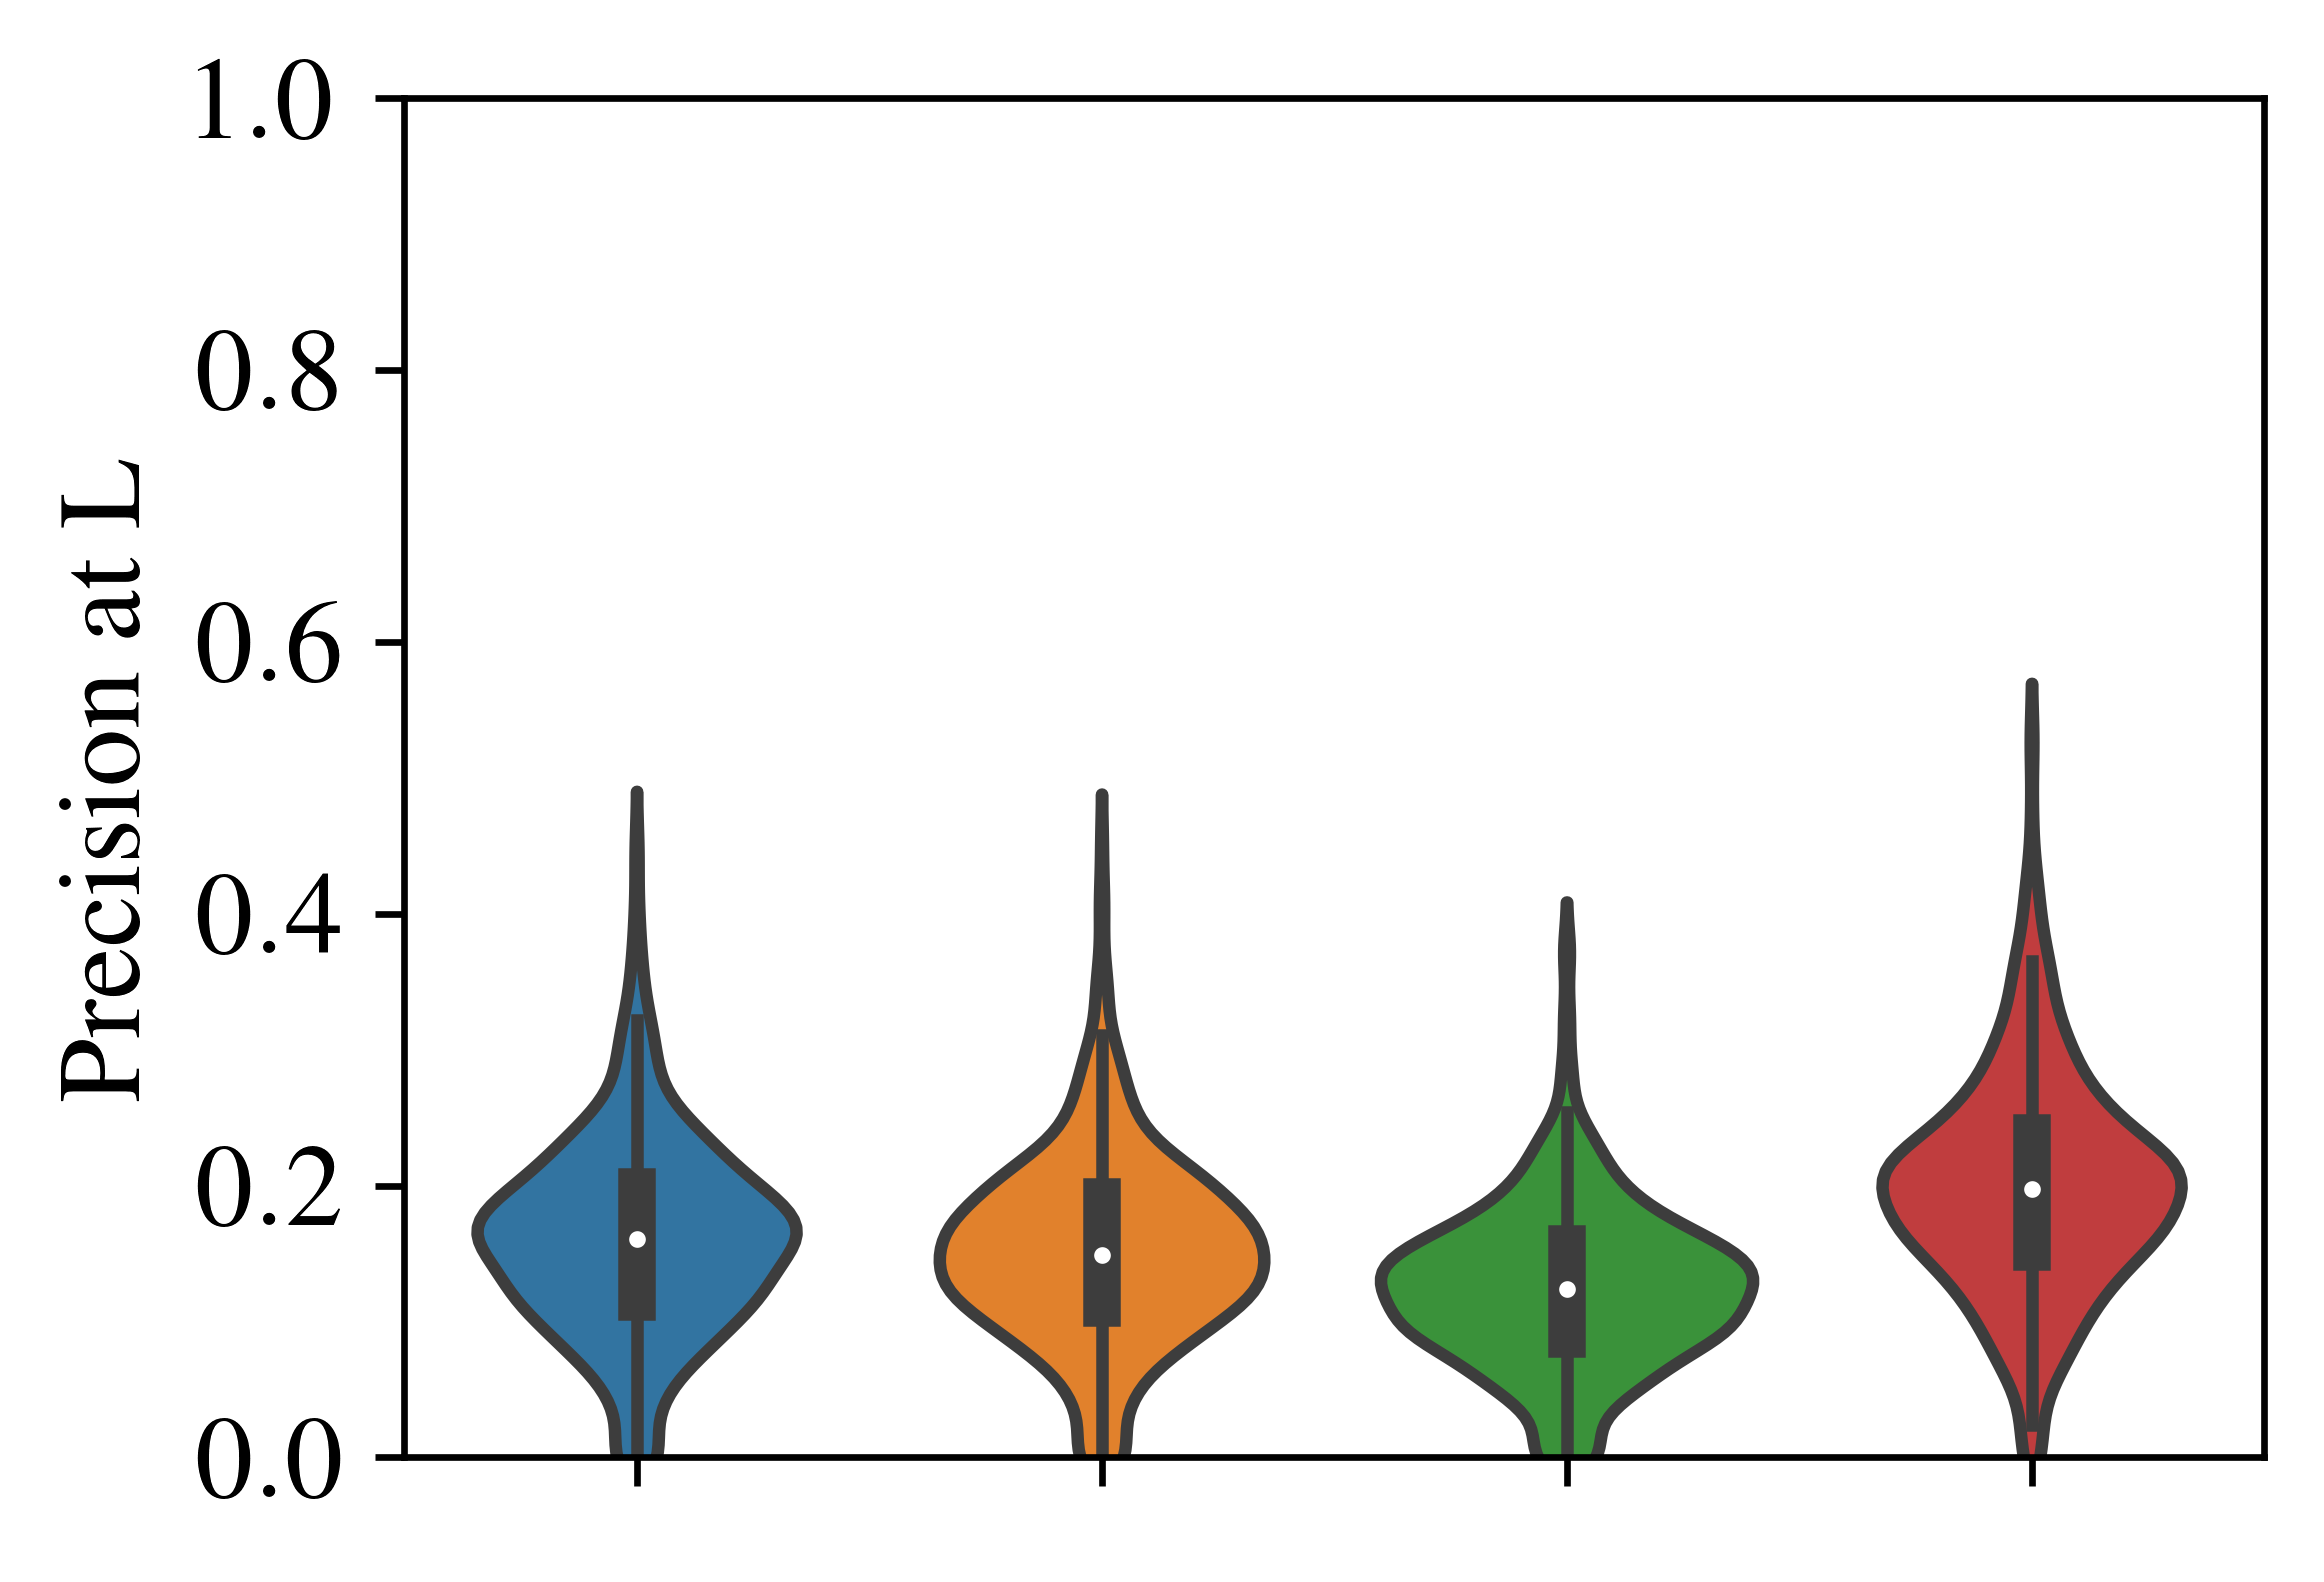

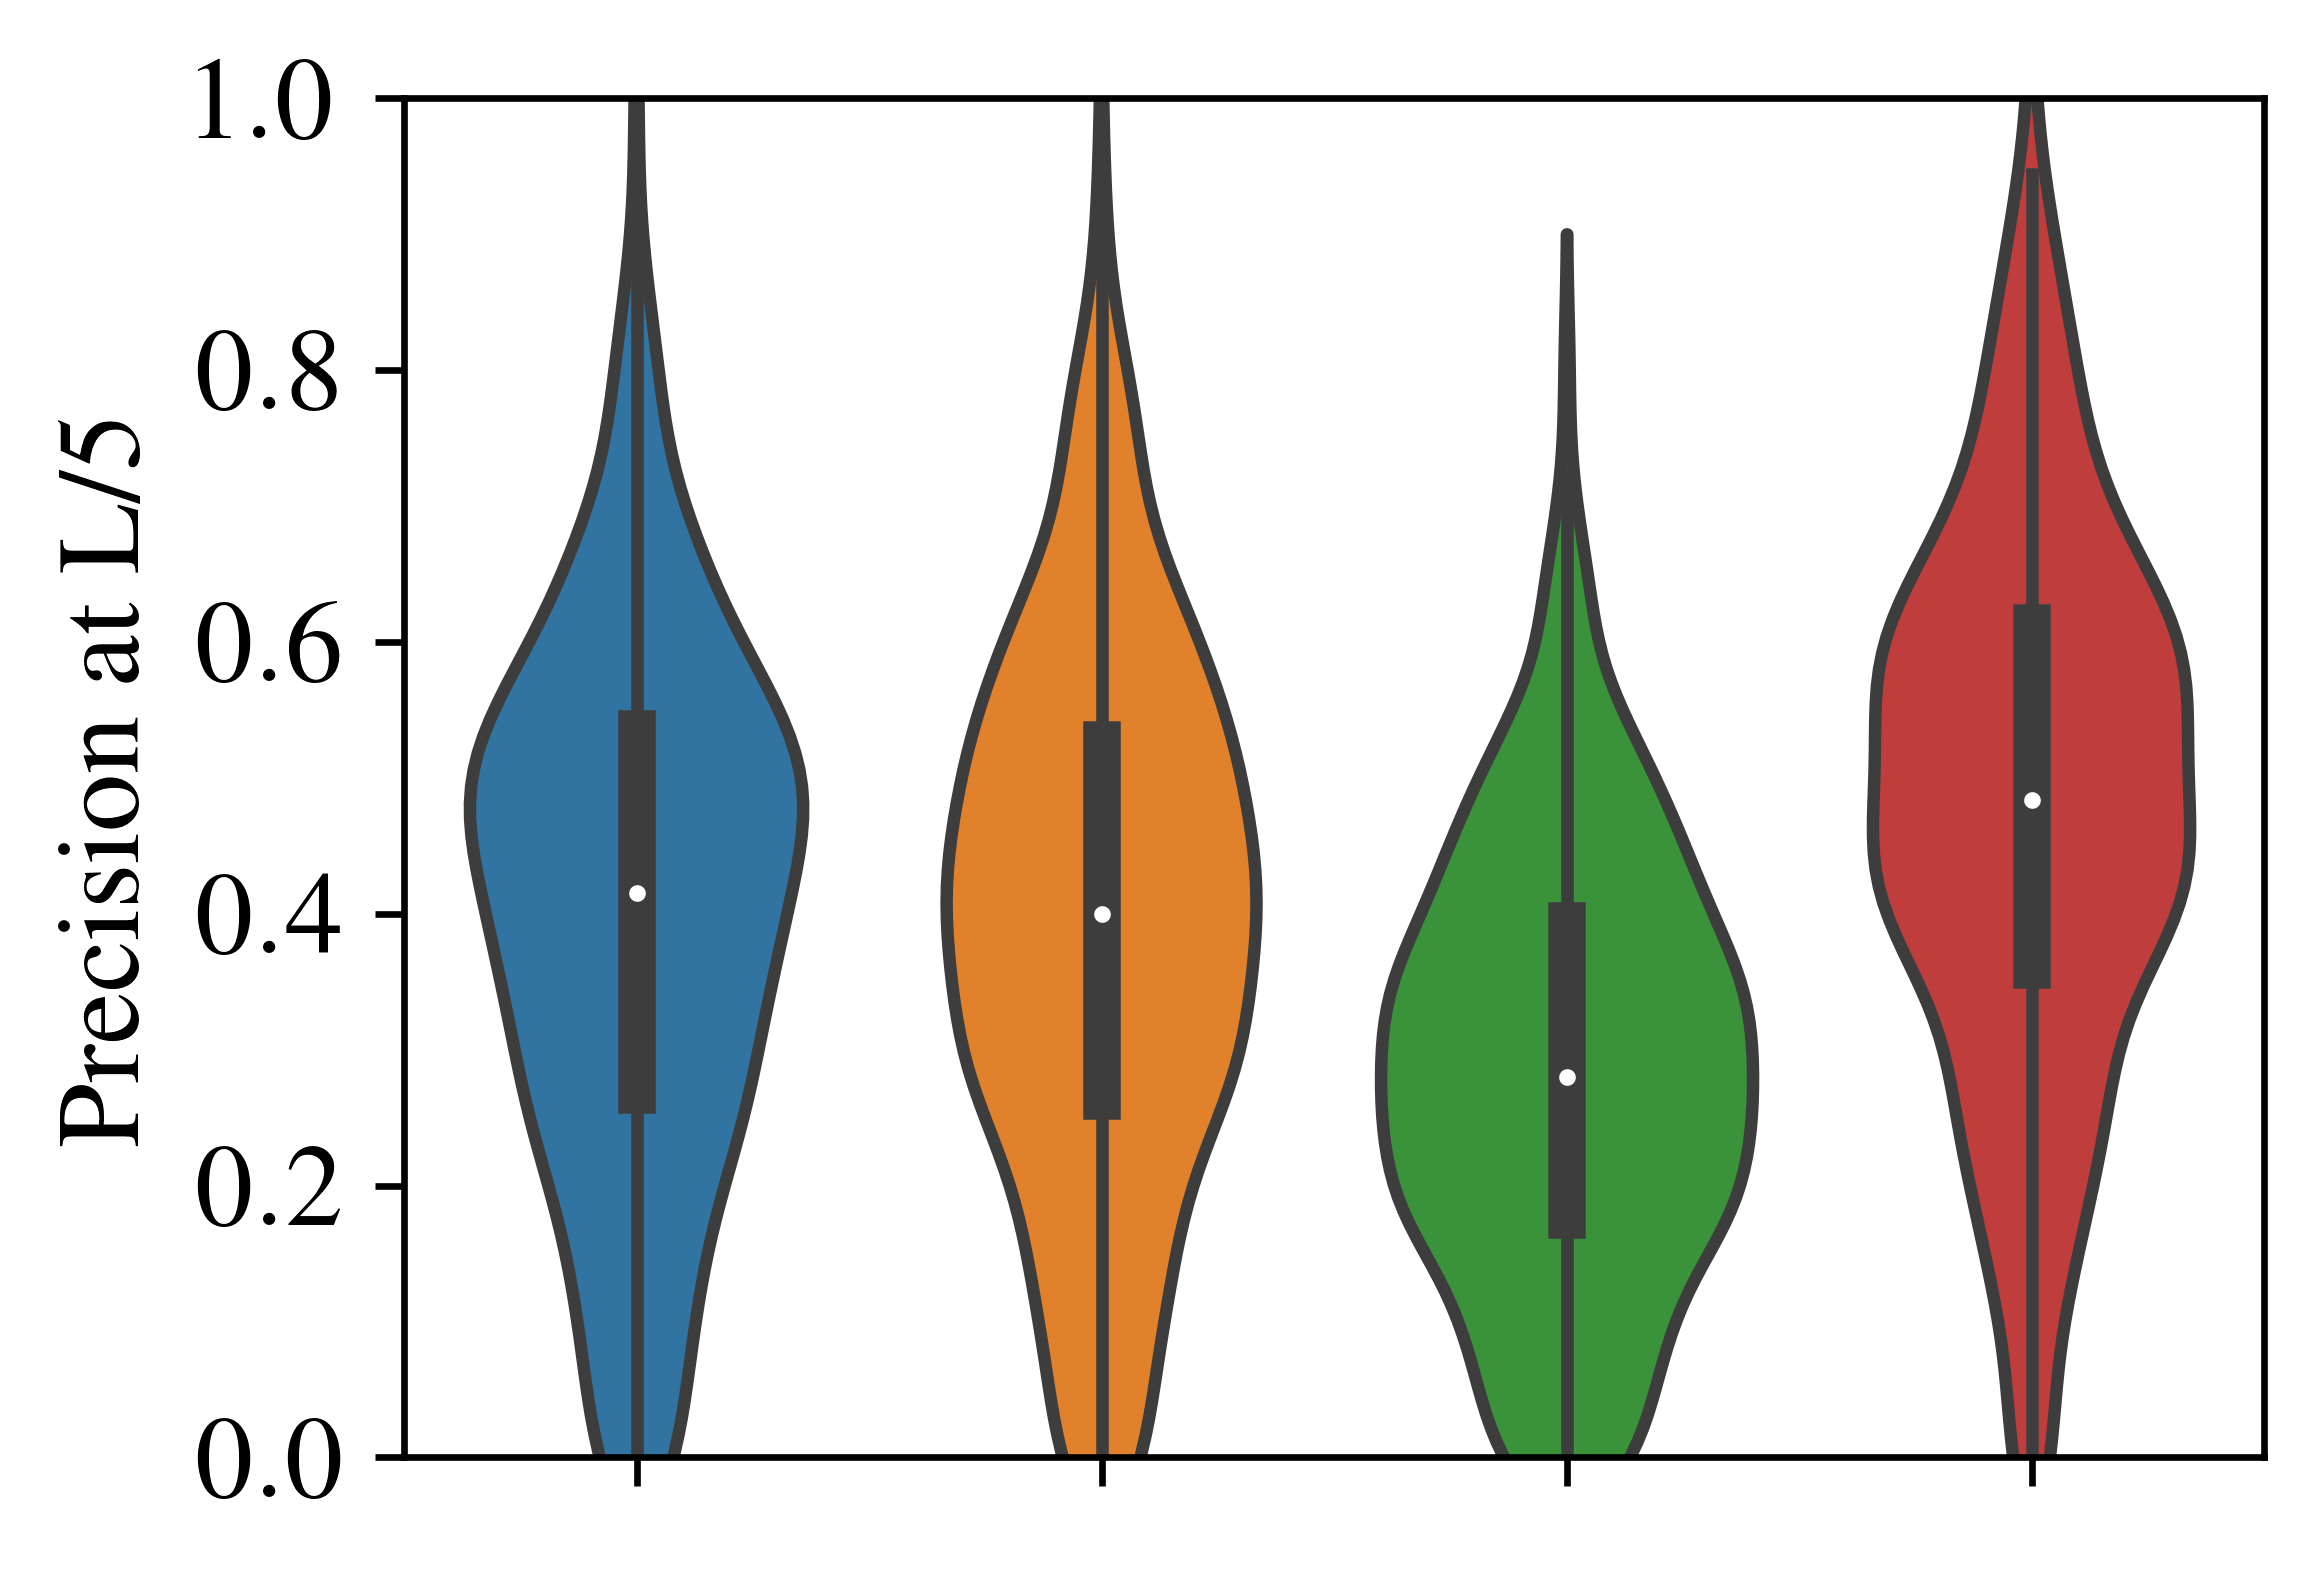

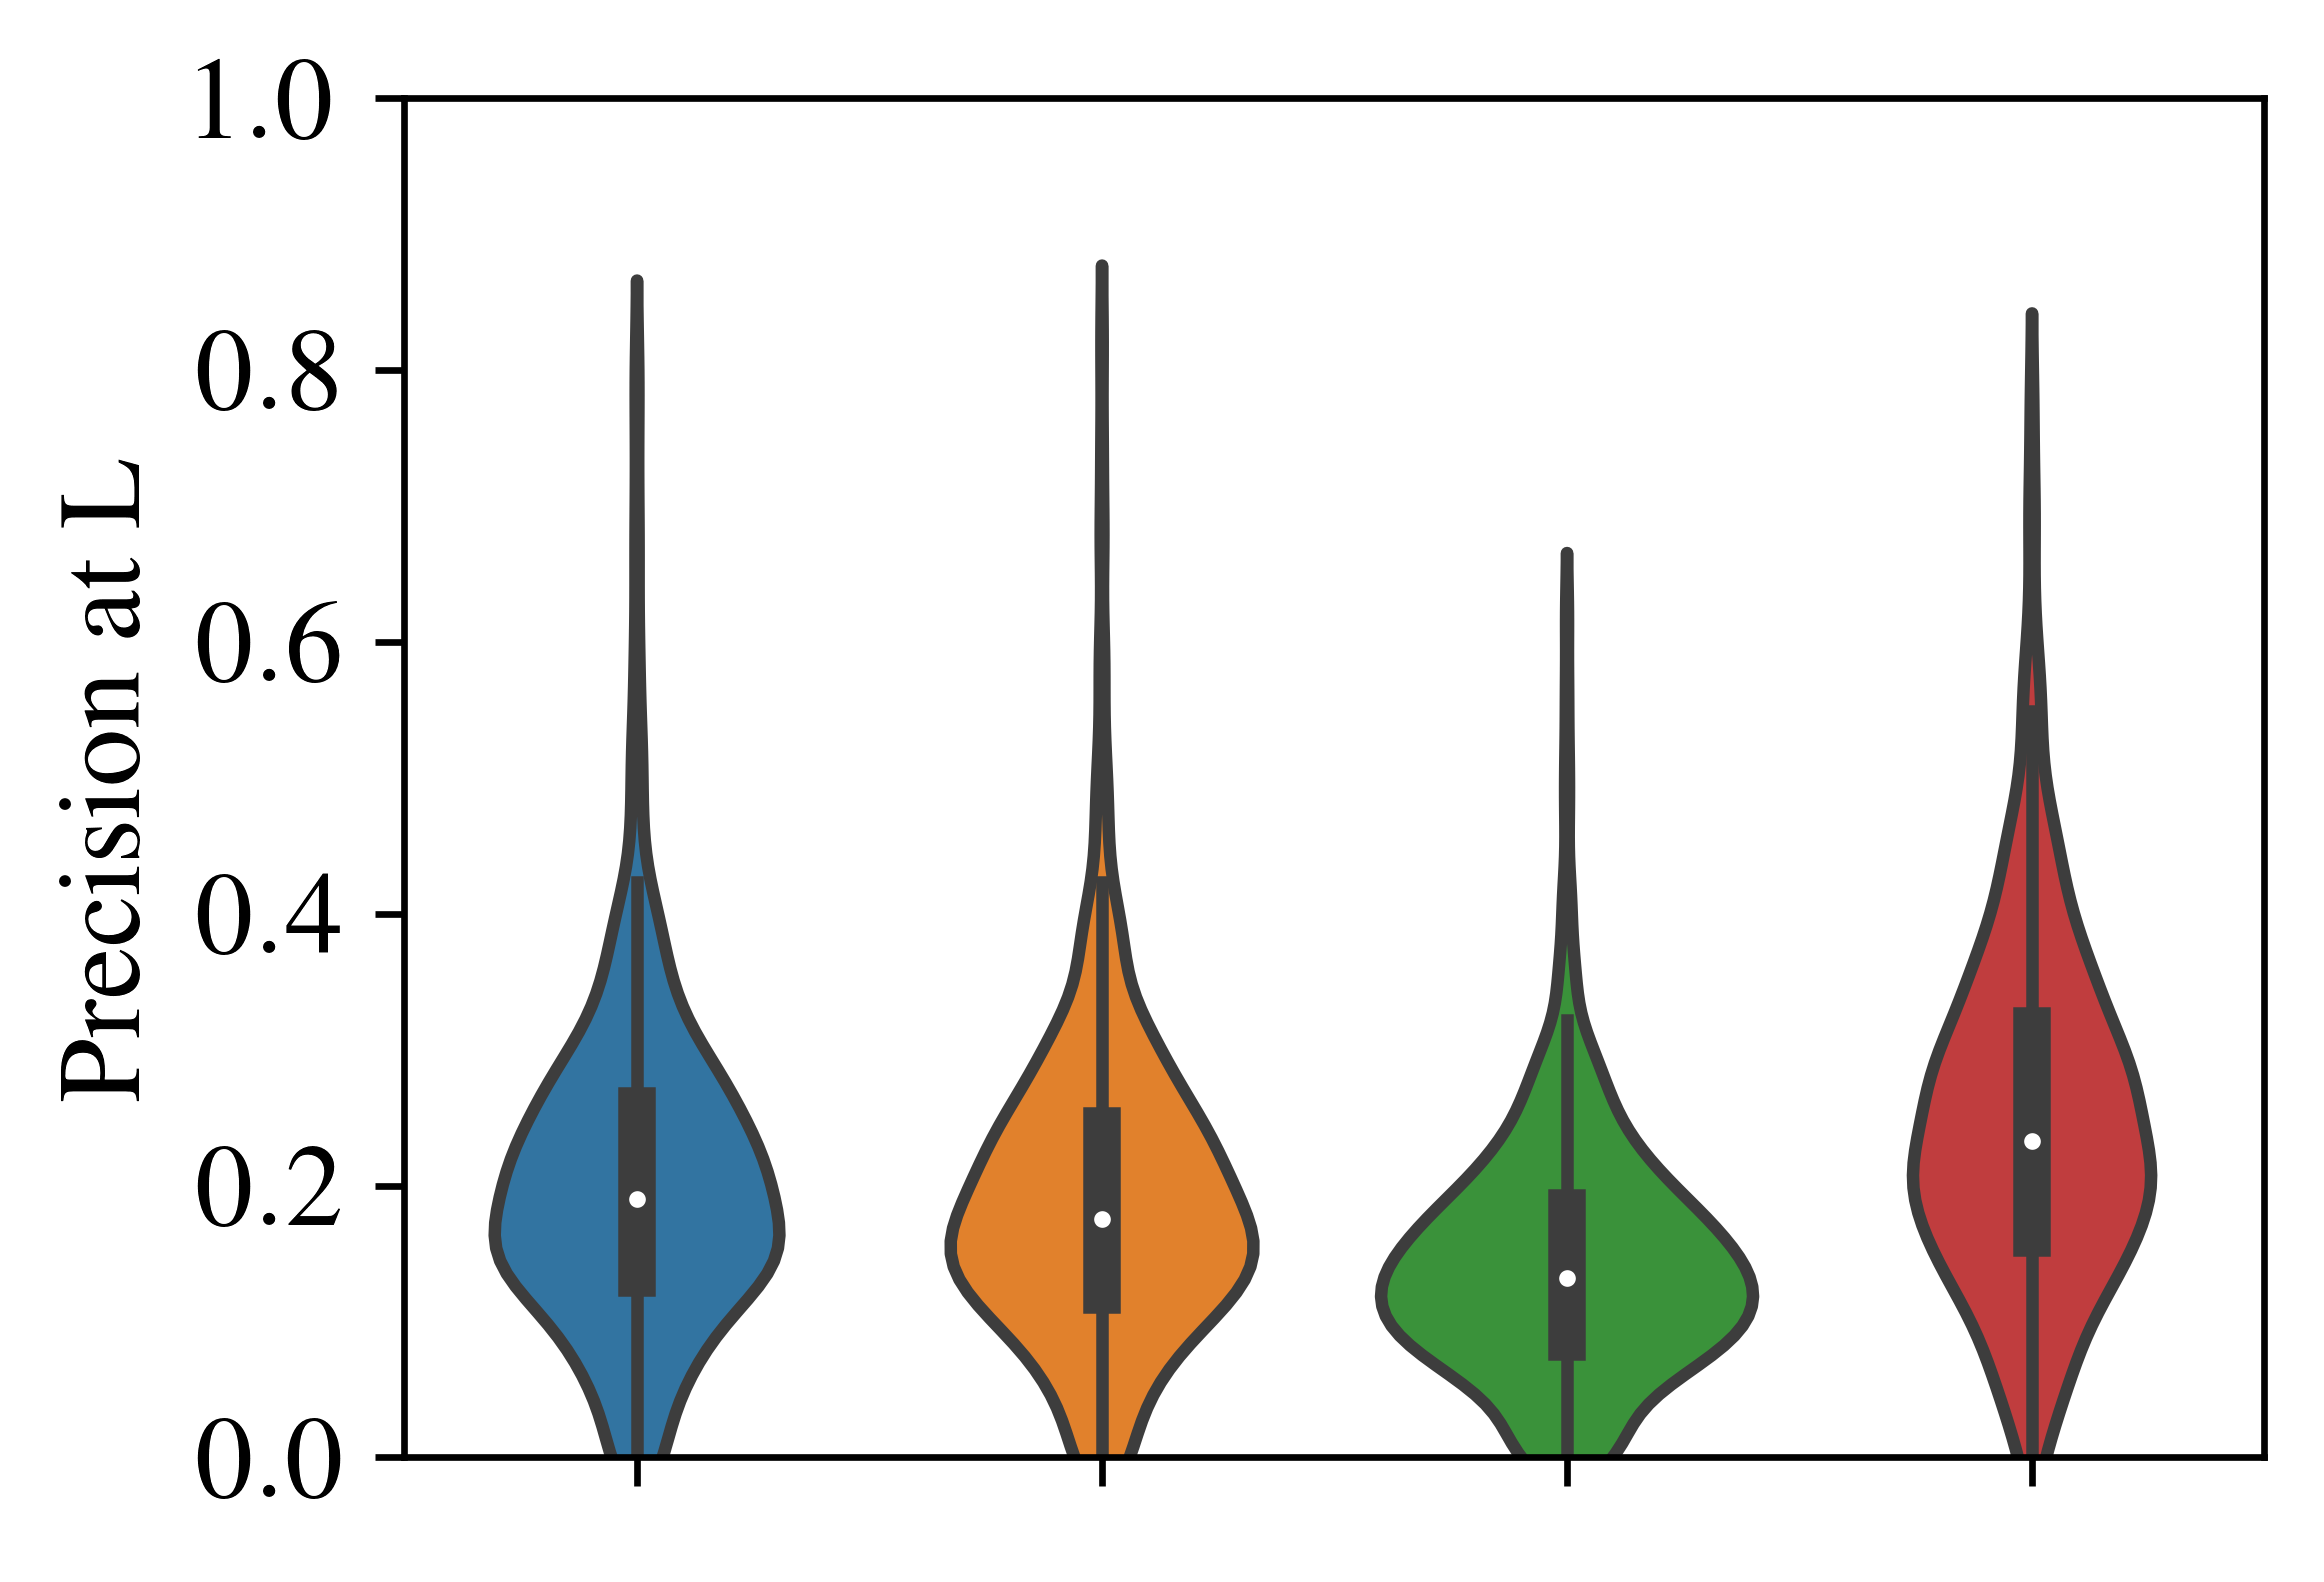

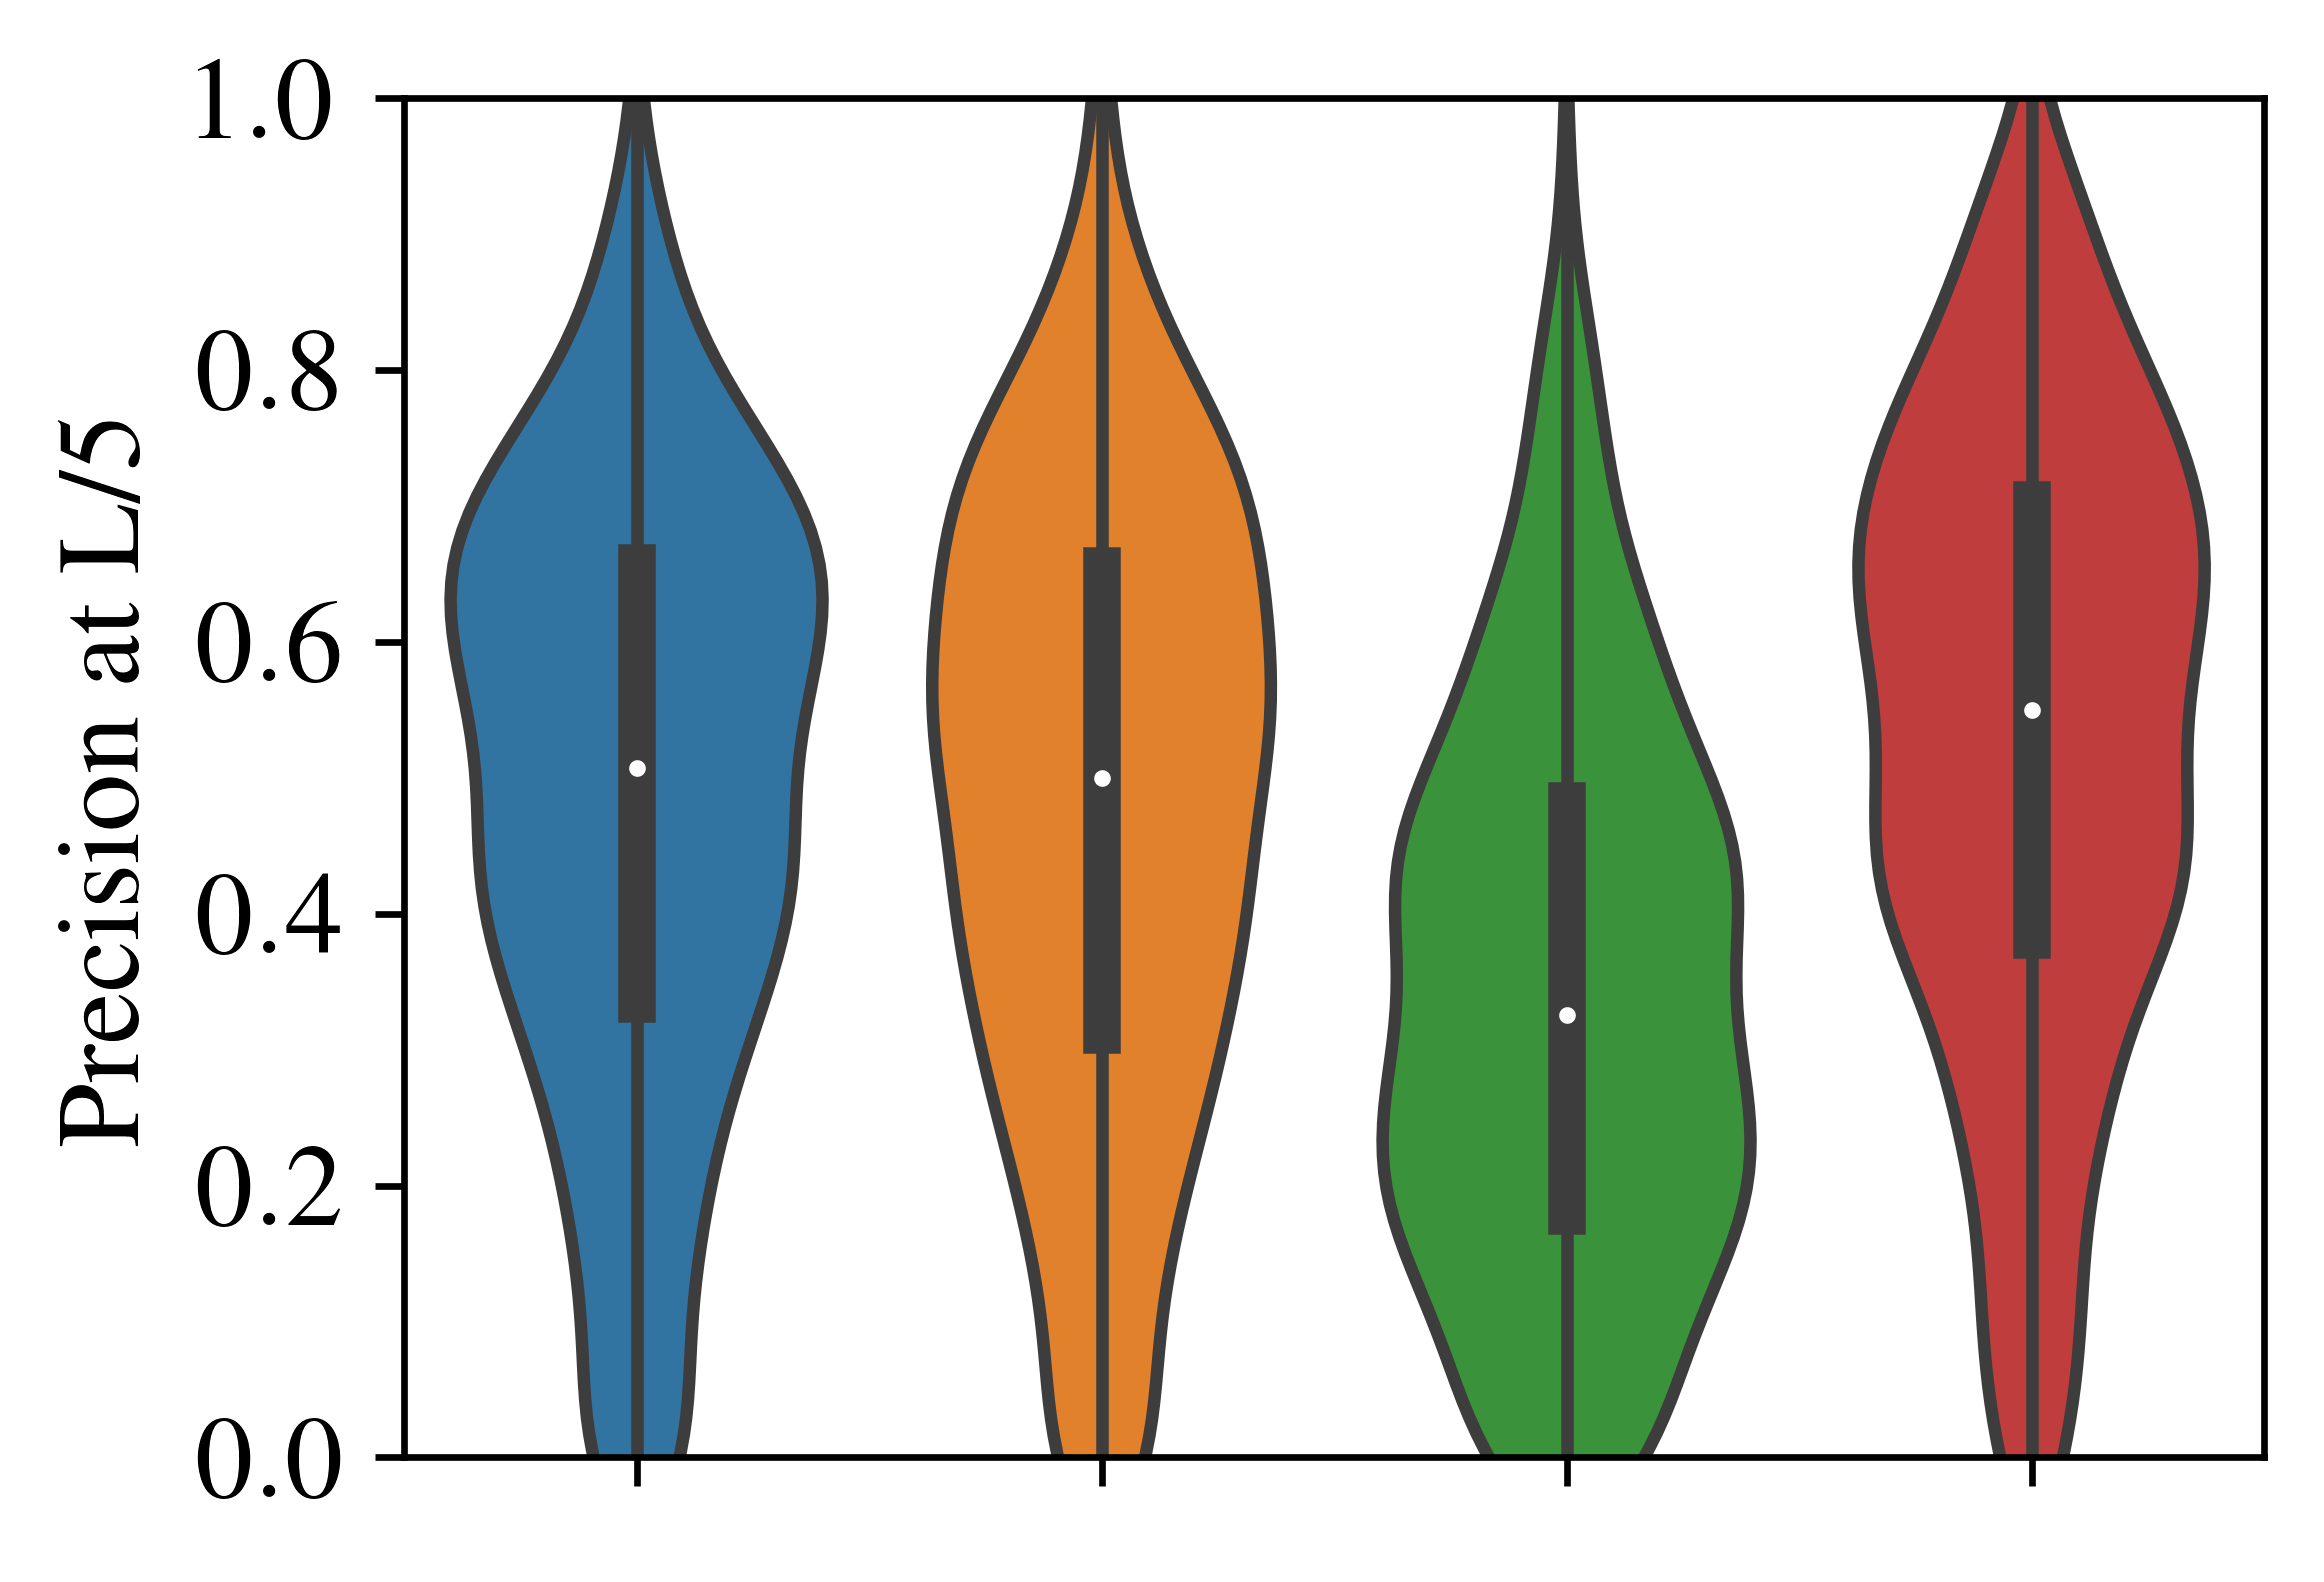

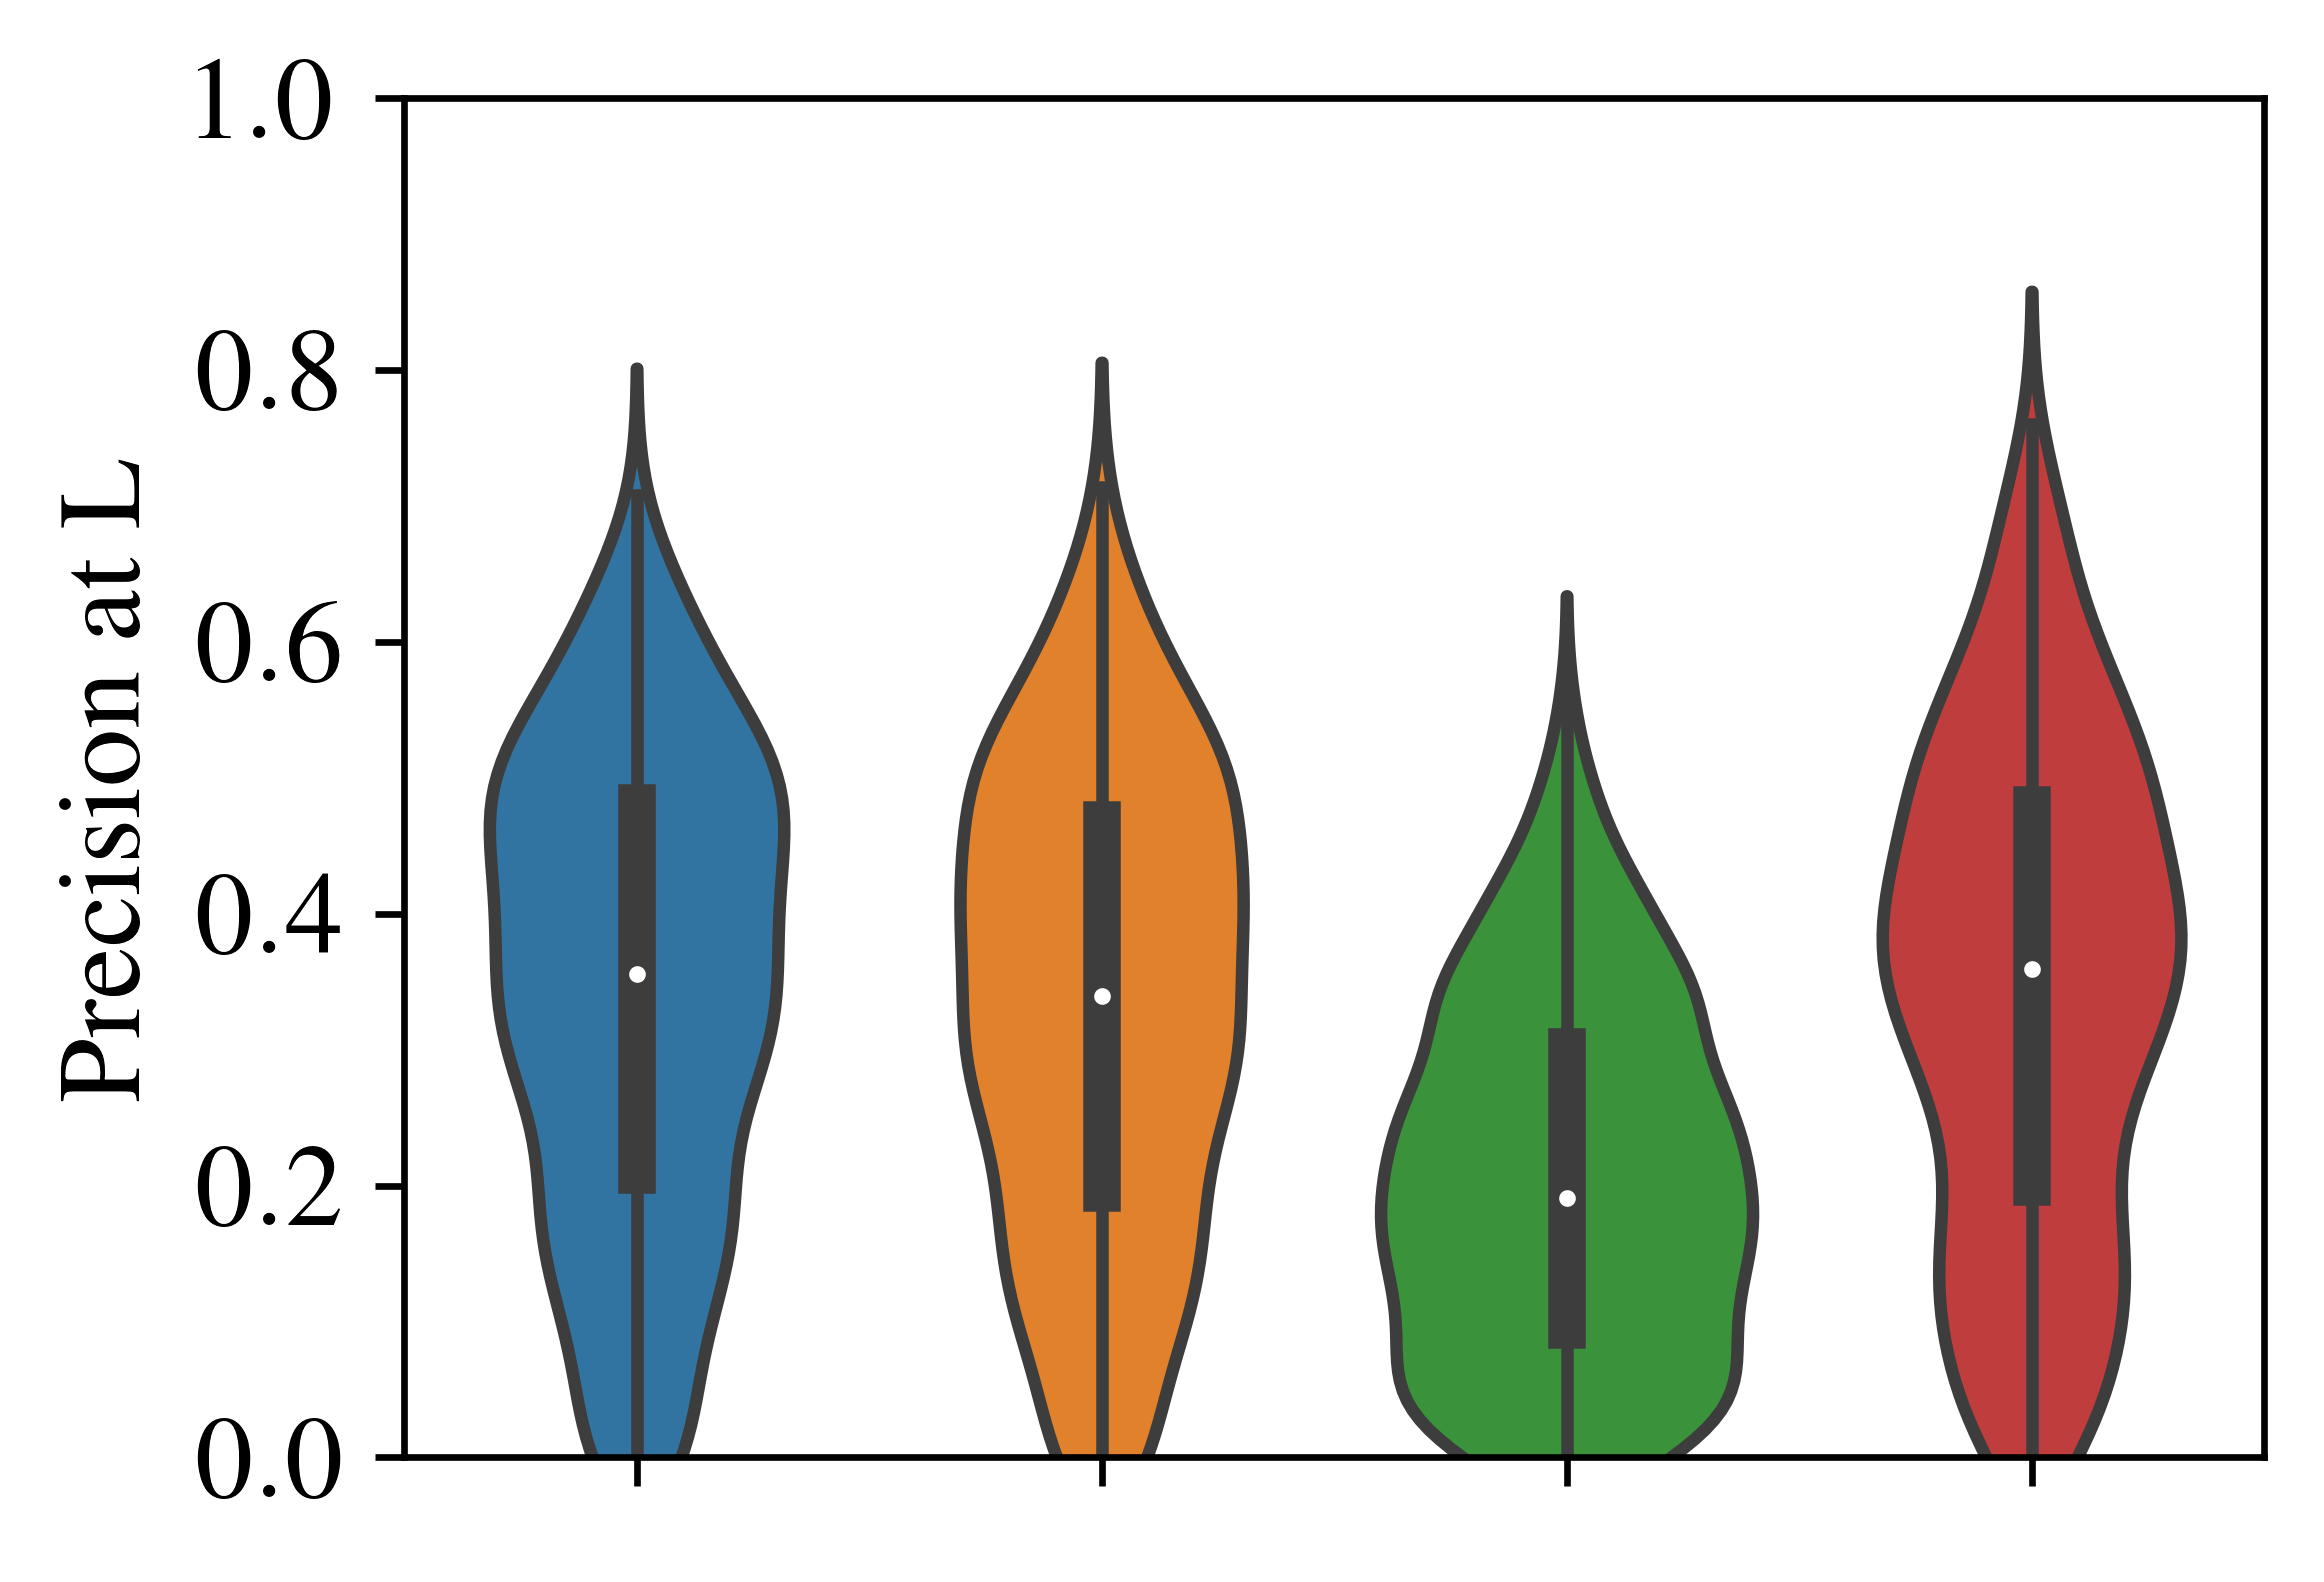

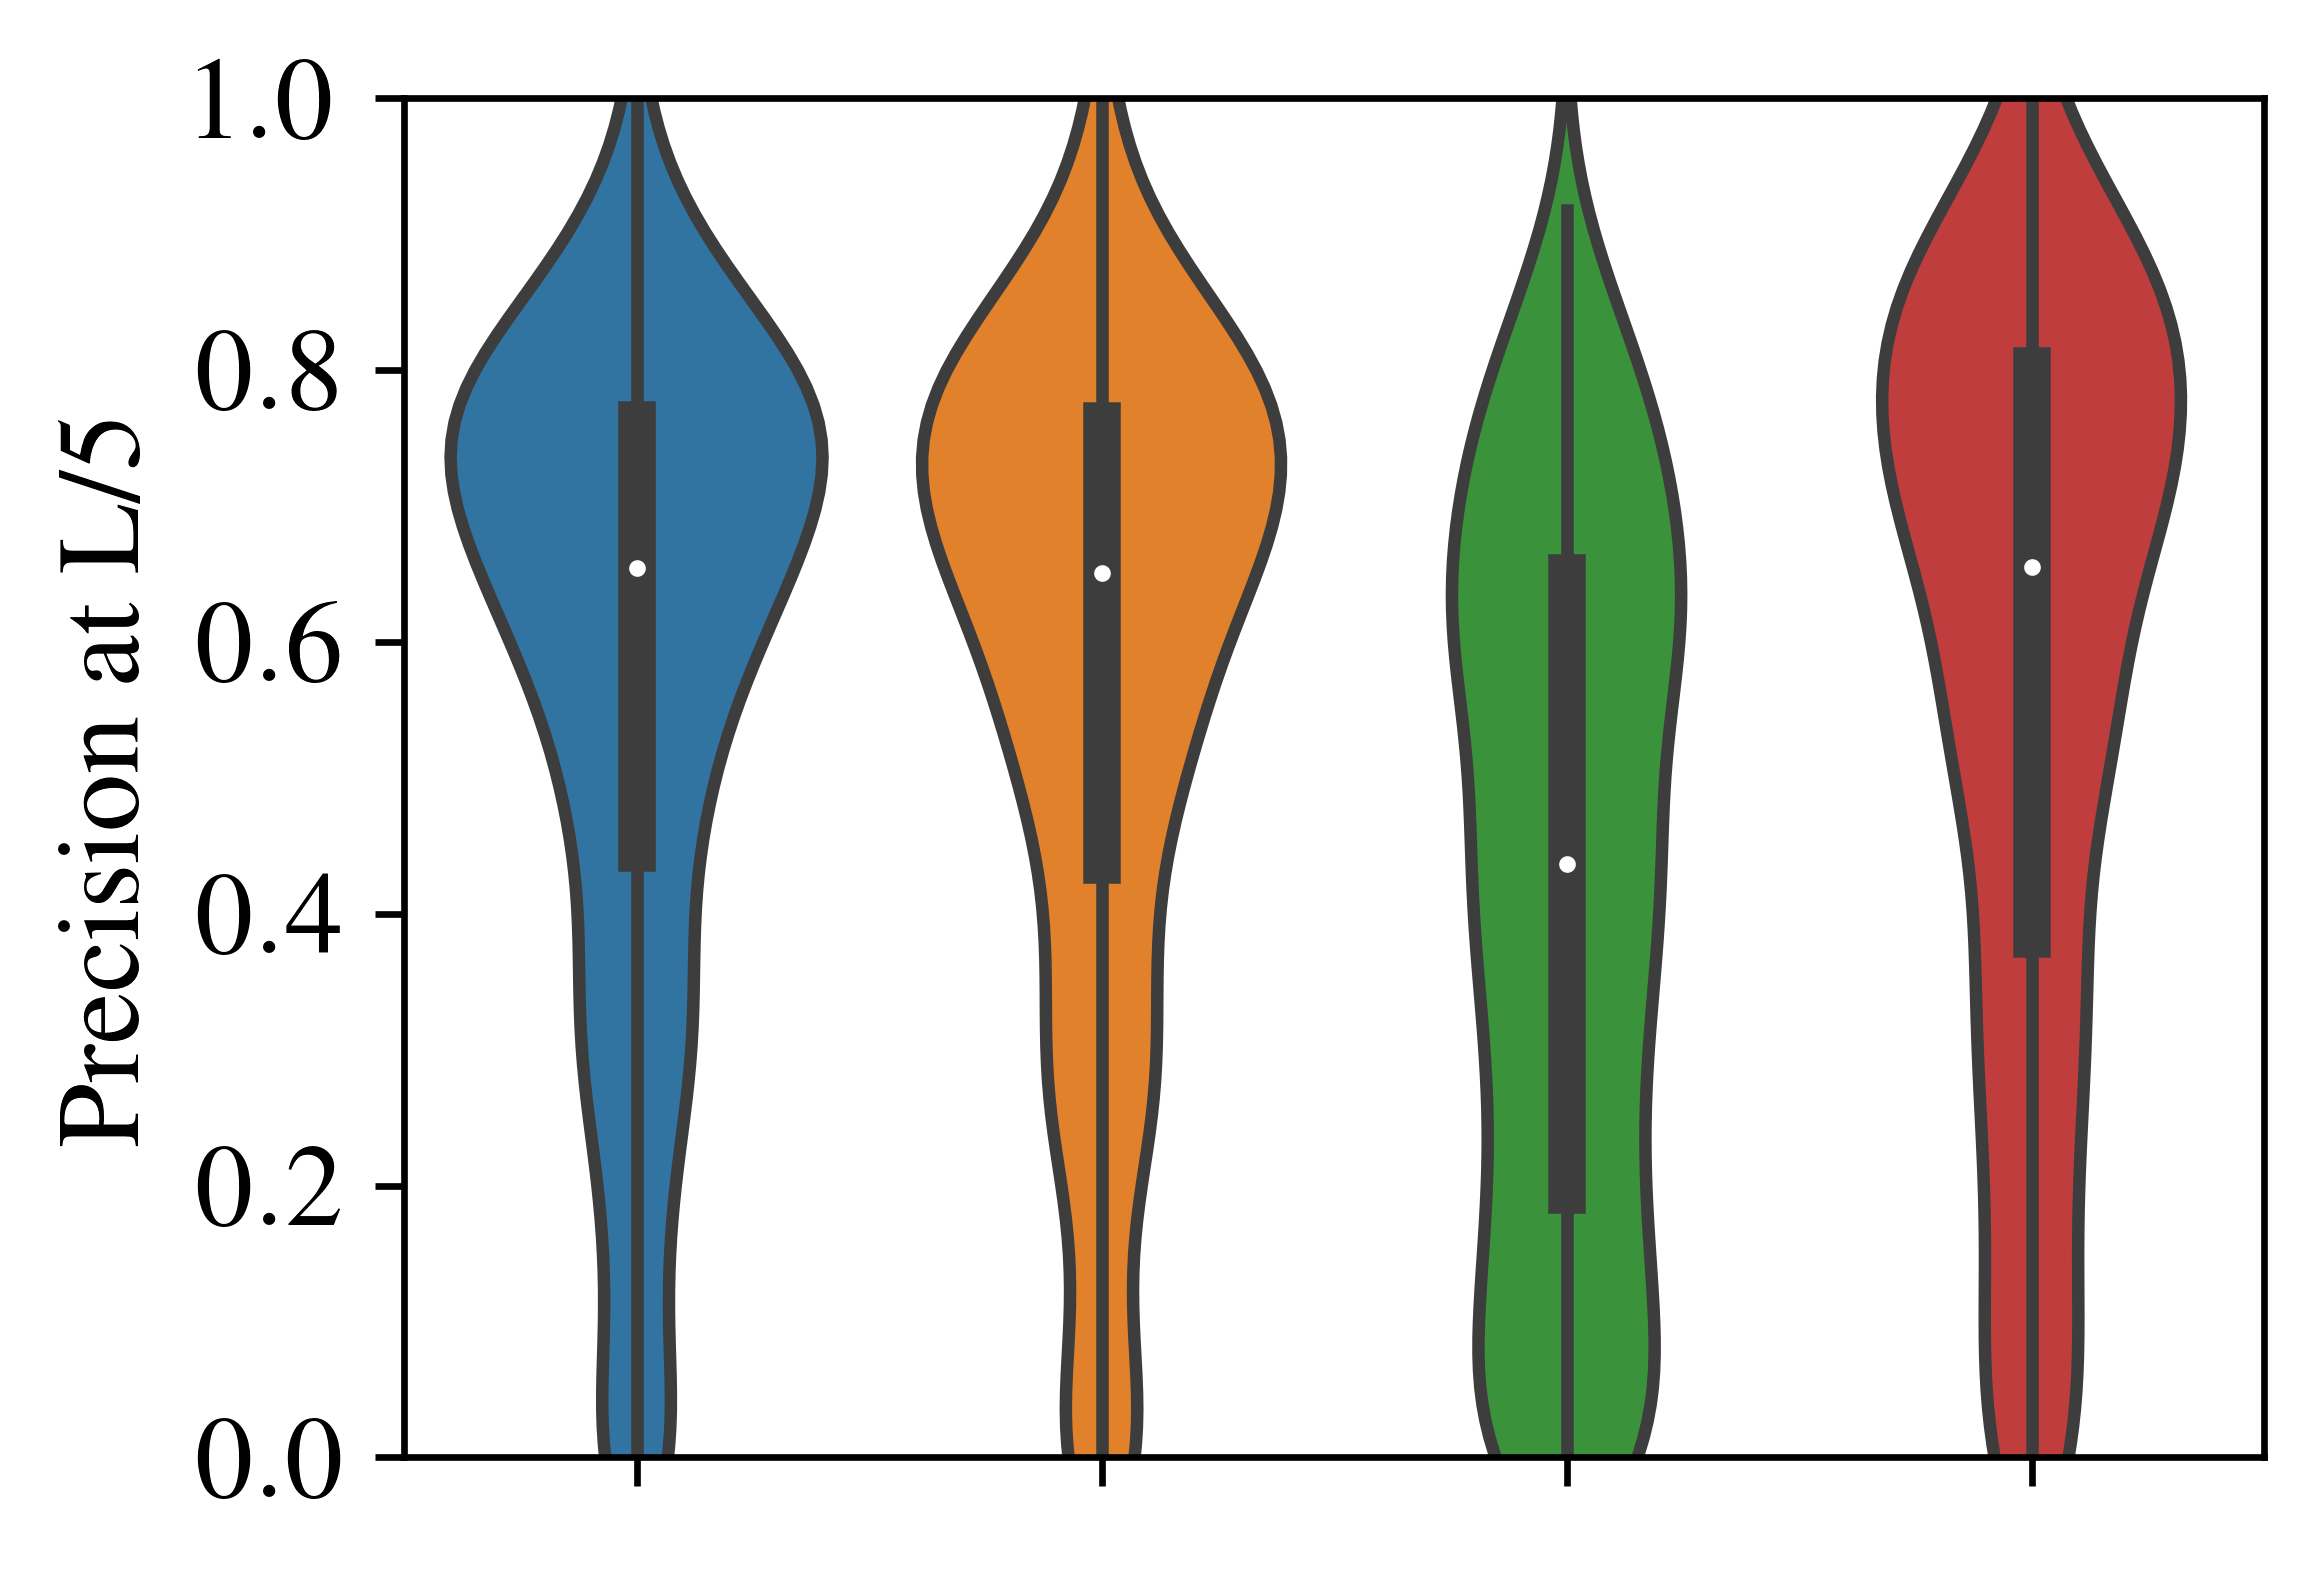

In [34]:
for category in ['short', 'medium', 'long']:
    for cutoff in ['l', 'l_5']:
        plt.figure(figsize=(4, 3), dpi=600)
        g = sns.violinplot(data=full_df, x='model', y=f'{category}_pr_at_{cutoff}')
        g.set_xticklabels(['', '', '', ''])

        plt.ylim(0, 1)
        plt.xlabel('')
        
#         if category == 'short':
        if cutoff == 'l_5':
            g.set_ylabel('Precision at L/5')
        else:
            g.set_ylabel('Precision at L')
#         else:
#             g.set_ylabel('')
#             g.set_yticklabels(['']*6)
        plt.savefig(f'stratified_{category}_precision_at_{cutoff}.pdf', dpi=600, bbox_inches="tight")



In [35]:
plt.close()
plt.figure(figsize = (6, 6/3), dpi=600)
melted_df = pd.melt(full_df, id_vars=['model'], value_vars=['short_pr_at_l_5', 'medium_pr_at_l_5', 'long_pr_at_l_5'])
# plt.subplots(dpi=600)
g = sns.catplot(x="variable", 
                y="value", 
                hue="model",
                data=melted_df, 
                kind="box",
                height=10, 
                aspect=2)
# plt.title('Stratified Precision at L/5')
g._legend.set_title('')
g.set_xticklabels(['Short [6, 12)', 'Medium [13, 24)', r'Long $\geq 24$'])
plt.ylabel('Precision at L/5')
plt.xlabel('Contact Range')

new_labels = ['Potts', 'Factored Attn', 'Single-Layer Attn', 'ProtBERT-BFD']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
plt.ylim([0, 1])
plt.savefig('stratified_precision_p_at_l_5.pdf', dpi=600, bbox_inches="tight")

RuntimeError: latex was not able to process the following string:
b'short_pr_at_l_5'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode

(/home/nthomas/.cache/matplotlib/tex.cache/b1a83e0ff0384fbe10a557d191423fb6.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/mathptmx.sty)
(/usr/share/texmf/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.dfu)))
(./b1a83e0ff0384fbe10a557d191423fb6.aux)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/ot1ptm.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily short_
                      pr_at_l_5}
No pages of output.
Transcript written on b1a83e0ff0384fbe10a557d191423fb6.log.




Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fea89fcfc80> (for post_execute):


RuntimeError: latex was not able to process the following string:
b'short_pr_at_l_5'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode

(/home/nthomas/.cache/matplotlib/tex.cache/b1a83e0ff0384fbe10a557d191423fb6.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/mathptmx.sty)
(/usr/share/texmf/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.dfu)))
(./b1a83e0ff0384fbe10a557d191423fb6.aux)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/ot1ptm.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily short_
                      pr_at_l_5}
No pages of output.
Transcript written on b1a83e0ff0384fbe10a557d191423fb6.log.




<Figure size 3600x1200 with 0 Axes>

RuntimeError: latex was not able to process the following string:
b'short_pr_at_l_5'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode

(/home/nthomas/.cache/matplotlib/tex.cache/b1a83e0ff0384fbe10a557d191423fb6.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/mathptmx.sty)
(/usr/share/texmf/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.dfu)))
(./b1a83e0ff0384fbe10a557d191423fb6.aux)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/ot1ptm.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily short_
                      pr_at_l_5}
No pages of output.
Transcript written on b1a83e0ff0384fbe10a557d191423fb6.log.




<Figure size 1440x720 with 1 Axes>

In [ ]:
plt.close()
plt.figure(figsize = (6, 6/3), dpi=600)
melted_df = pd.melt(full_df, id_vars=['model'], value_vars=['short_pr_at_l', 'medium_pr_at_l', 'long_pr_at_l'])

# plt.subplots(dpi=600)
g = sns.catplot(x="variable", 
                y="value", 
                hue="model",
                data=melted_df, 
                kind="box",
                height=10, 
                aspect=2)
# plt.title('Stratified Precision at L')
g._legend.set_title('')
g.set_xticklabels(['Short [6, 12)', 'Medium [13, 24)', r'Long $\geq 24$'])
plt.ylabel('Precision at L')
plt.xlabel('Contact Range')

new_labels = ['Potts', 'Factored Attn', 'Single-Layer Attn', 'ProtBERT-BFD']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
plt.ylim([0, 1])
plt.savefig('stratified_precision_p_at_l_5.pdf', dpi=600, bbox_inches="tight")

In [38]:
for metric in ['short_pr_at_l', 'medium_pr_at_l', 'long_pr_at_l']:
    print('----')
    for model in ['gremlin', 'factored-attention', 'transformer', 'protbert_bfd']:
        print(model, metric, full_df[full_df['model'] == model][metric].median(), sep='\t')

----
gremlin	short_pr_at_l	0.1610453873872757
factored-attention	short_pr_at_l	0.14906832575798035
transformer	short_pr_at_l	0.12408759444952011
protbert_bfd	short_pr_at_l	0.19718310236930847
----
gremlin	medium_pr_at_l	0.19004248827695847
factored-attention	medium_pr_at_l	0.17553190886974335
transformer	medium_pr_at_l	0.13167259097099304
protbert_bfd	medium_pr_at_l	0.2327791005373001
----
gremlin	long_pr_at_l	0.3553854525089264
factored-attention	long_pr_at_l	0.3396880328655243
transformer	long_pr_at_l	0.19112628698349
protbert_bfd	long_pr_at_l	0.359649121761322


In [39]:
for metric in ['short_pr_at_l_5', 'medium_pr_at_l_5', 'long_pr_at_l_5']:
    print('----')
    for model in ['gremlin', 'factored-attention', 'transformer', 'protbert_bfd']:
        print(model, metric, full_df[full_df['model'] == model][metric].median(), sep='\t')

----
gremlin	short_pr_at_l_5	0.4150080233812332
factored-attention	short_pr_at_l_5	0.4000000059604645
transformer	short_pr_at_l_5	0.2800000011920929
protbert_bfd	short_pr_at_l_5	0.4838709533214569
----
gremlin	medium_pr_at_l_5	0.5069803297519684
factored-attention	medium_pr_at_l_5	0.5
transformer	medium_pr_at_l_5	0.3255814015865326
protbert_bfd	medium_pr_at_l_5	0.550000011920929
----
gremlin	long_pr_at_l_5	0.6545092761516571
factored-attention	long_pr_at_l_5	0.6507936716079712
transformer	long_pr_at_l_5	0.4363636374473572
protbert_bfd	long_pr_at_l_5	0.6551724076271057


In [10]:
full_df[full_df['model'] == 'protbert_bfd']['short_pr_at_l_5'].median() - full_df[full_df['model'] == 'gremlin']['short_pr_at_l_5'].median() 

0.0688629299402237

In [11]:
pbfd_vs_gremlin_df = full_df[full_df['model'] == 'protbert_bfd'].merge(full_df[full_df['model'] == 'gremlin'], on='pdb')
(pbfd_vs_gremlin_df['short_pr_at_l_5_x'] - pbfd_vs_gremlin_df['short_pr_at_l_5_y']).median()

0.06818181276321411

In [12]:
dif_med = full_df[full_df['model'] == 'protbert_bfd']['long_pr_at_l_5'].median() - full_df[full_df['model'] == 'gremlin']['long_pr_at_l_5'].median() 

pbfd_vs_gremlin_df = full_df[full_df['model'] == 'protbert_bfd'].merge(full_df[full_df['model'] == 'gremlin'], on='pdb')
med_dif = (pbfd_vs_gremlin_df['long_pr_at_l_5_x'] - pbfd_vs_gremlin_df['long_pr_at_l_5_y']).median()
print(dif_med)
print(med_dif)

0.0006631314754486084
0.0


In [13]:
pbfd_vs_gremlin_df['long_pr_at_l_5_x'] - pbfd_vs_gremlin_df['long_pr_at_l_5_y']

0      0.250000
1      0.142857
2      0.000000
3     -0.161290
4     -0.157895
         ...   
676   -0.479167
677    0.032258
678   -0.170455
679   -0.046512
680    0.306667
Length: 681, dtype: float64

In [19]:
import numpy as np
np.median(full_df[full_df['model'] == 'factored-attention']['long_pr_at_l_5'])

0.6507936716079712

In [20]:
np.median(full_df[full_df['model'] == 'protbert_bfd']['long_pr_at_l_5'][:-10])

0.6590909361839294

In [21]:
import numpy as np

In [22]:
full_df[full_df['model'] == 'protbert_bfd'][:-10][['pdb', 'long_pr_at_l_5', 'short_pr_at_l_5']]

,pdb,long_pr_at_l_5,short_pr_at_l_5
0,2w3o_1_A,0.750000,0.800000
1,1eqz_1_B,0.333333,0.142857
2,3no0_1_A,0.909091,0.636364
3,1xju_1_A,0.516129,0.290323
4,4ew5_1_B,0.000000,0.315789
...,...,...,...
708,3bm4_1_A,0.641026,0.743590
709,2exe_1_A,0.500000,0.346154
710,4ckm_1_B,0.000000,0.222222
711,2j7a_1_F,0.103448,0.172414


In [23]:
full_df[full_df['model'] == 'factored_attention'][:-10][['pdb', 'pdb_idx','long_pr_at_l_5', 'short_pr_at_l_5']]

,pdb,pdb_idx,long_pr_at_l_5,short_pr_at_l_5


In [24]:
fatt_metatest_df = fatt_df[fatt_df['num_attention_heads'] == 256]
fatt_metatest_df.sort_values(by='pdb')

,pdb,msa_length,num_seqs,attention_head_size,num_attention_heads,short_auc,short_pr_at_l,short_pr_at_l_2,short_pr_at_l_5,short_pr_at_l_10,...,medium_pr_at_l,medium_pr_at_l_2,medium_pr_at_l_5,medium_pr_at_l_10,long_auc,long_pr_at_l,long_pr_at_l_2,long_pr_at_l_5,long_pr_at_l_10,model
76,1a62_1_A,125,2641,32,256,0.219314,0.144000,0.193548,0.280000,0.500000,...,0.160000,0.241935,0.480000,0.666667,0.364533,0.232000,0.306452,0.560000,0.666667,factored-attention
40,1b4u_1_A,132,2165,32,256,0.347196,0.174242,0.287879,0.653846,0.769231,...,0.151515,0.287879,0.500000,0.461538,0.310090,0.174242,0.272727,0.461538,0.615385,factored-attention
70,1b82_1_A,349,3080,32,256,0.164347,0.131805,0.160920,0.188406,0.235294,...,0.126074,0.195402,0.304348,0.411765,0.392095,0.277937,0.390805,0.492754,0.588235,factored-attention
26,1bxw_1_A,150,11964,32,256,0.488942,0.293333,0.440000,0.733333,0.933333,...,0.493333,0.773333,1.000000,1.000000,0.593270,0.413333,0.573333,0.766667,0.800000,factored-attention
34,1ca9_1_A,191,5115,32,256,0.194335,0.104712,0.168421,0.289474,0.473684,...,0.151832,0.284211,0.552632,0.842105,0.533404,0.376963,0.526316,0.736842,0.684211,factored-attention
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,6b57_1_A,201,2222,32,256,0.333153,0.174129,0.270000,0.525000,0.800000,...,0.194030,0.320000,0.500000,0.750000,0.476143,0.308458,0.450000,0.700000,0.700000,factored-attention
76,6bxg_1_A,98,16811,32,256,0.442109,0.295918,0.387755,0.631579,0.777778,...,0.459184,0.714286,0.894737,1.000000,0.781231,0.622449,0.795918,0.894737,0.888889,factored-attention
67,6c5c_1_B,383,9133,32,256,0.265503,0.143603,0.235602,0.407895,0.605263,...,0.164491,0.314136,0.526316,0.684211,0.692592,0.582245,0.691099,0.789474,0.763158,factored-attention
42,6cw0_1_B,103,4759,32,256,0.262691,0.116505,0.196078,0.400000,0.800000,...,0.145631,0.235294,0.550000,0.800000,0.488215,0.330097,0.549020,0.650000,0.400000,factored-attention


In [25]:
pbfd_df.sort_values(by='pdb')

,sweep_name,pdb,pdb_idx,msa_length,num_seqs,run_state,pr_at_L,pr_at_L_apc,pr_at_L_5,pr_at_L_5_apc,...,medium_auc,medium_pr_at_l,medium_pr_at_l_2,medium_pr_at_l_5,medium_pr_at_l_10,long_auc,long_pr_at_l,long_pr_at_l_2,long_pr_at_l_5,long_pr_at_l_10
384,protbert_bfd,1a62_1_A,352,125.0,2641.0,finished,0.168000,0.200000,0.240000,0.240000,...,0.251876,0.184000,0.241935,0.360000,0.333333,0.180172,0.112000,0.193548,0.240000,0.250000
351,protbert_bfd,1b4u_1_A,387,132.0,2165.0,finished,0.204545,0.204545,0.253165,0.265823,...,0.117635,0.075758,0.106061,0.153846,0.230769,0.255814,0.151515,0.227273,0.384615,0.461538
379,protbert_bfd,1b82_1_A,357,349.0,3080.0,finished,0.191977,0.189112,0.234450,0.234450,...,0.203141,0.146132,0.183908,0.289855,0.323529,0.175422,0.123209,0.172414,0.217391,0.264706
415,protbert_bfd,1bxw_1_A,320,150.0,11964.0,finished,0.773333,0.786667,0.911111,0.922222,...,0.777397,0.586667,0.800000,0.966667,1.000000,0.677093,0.513333,0.640000,0.866667,0.933333
502,protbert_bfd,1ca9_1_A,226,191.0,5115.0,finished,0.324607,0.319372,0.429825,0.429825,...,0.351055,0.193717,0.315789,0.473684,0.789474,0.484617,0.319372,0.494737,0.605263,0.789474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,protbert_bfd,6b57_1_A,435,201.0,2222.0,finished,0.472637,0.462687,0.583333,0.600000,...,0.482803,0.278607,0.440000,0.700000,0.950000,0.312303,0.218905,0.320000,0.400000,0.400000
146,protbert_bfd,6bxg_1_A,597,98.0,16811.0,finished,0.632653,0.673469,0.741379,0.741379,...,0.637859,0.428571,0.632653,0.842105,1.000000,0.612472,0.418367,0.591837,0.842105,1.000000
534,protbert_bfd,6c5c_1_B,193,383.0,9133.0,finished,0.537859,0.537859,0.672489,0.676856,...,0.391964,0.216710,0.345550,0.618421,0.815789,0.610449,0.451697,0.602094,0.802632,0.868421
352,protbert_bfd,6cw0_1_B,385,103.0,4759.0,finished,0.436893,0.446602,0.524590,0.557377,...,0.341802,0.174757,0.294118,0.500000,0.800000,0.421626,0.339806,0.450980,0.550000,0.300000


In [26]:
merged_df = fatt_metatest_df.merge(pbfd_df, on='pdb')

In [27]:
merged_df.shape

(718, 51)

(array([  1.,   2.,   2.,   8.,  12.,  16.,  39.,  60., 113., 149.,  93.,
         71.,  50.,  35.,  25.,  19.,  10.,   5.,   6.,   2.]),
 array([-0.79545454, -0.71543791, -0.63542128, -0.55540465, -0.47538802,
        -0.39537139, -0.31535477, -0.23533814, -0.15532151, -0.07530488,
         0.00471175,  0.08472838,  0.16474501,  0.24476164,  0.32477827,
         0.4047949 ,  0.48481153,  0.56482815,  0.64484478,  0.72486141,
         0.80487804]),
 <BarContainer object of 20 artists>)

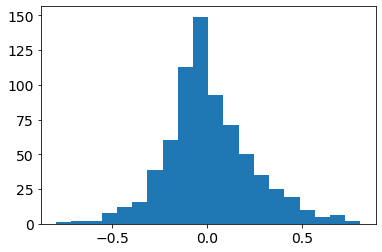

In [28]:
plt.hist(merged_df['long_pr_at_l_5_x'] - merged_df['long_pr_at_l_5_y'], bins=20)

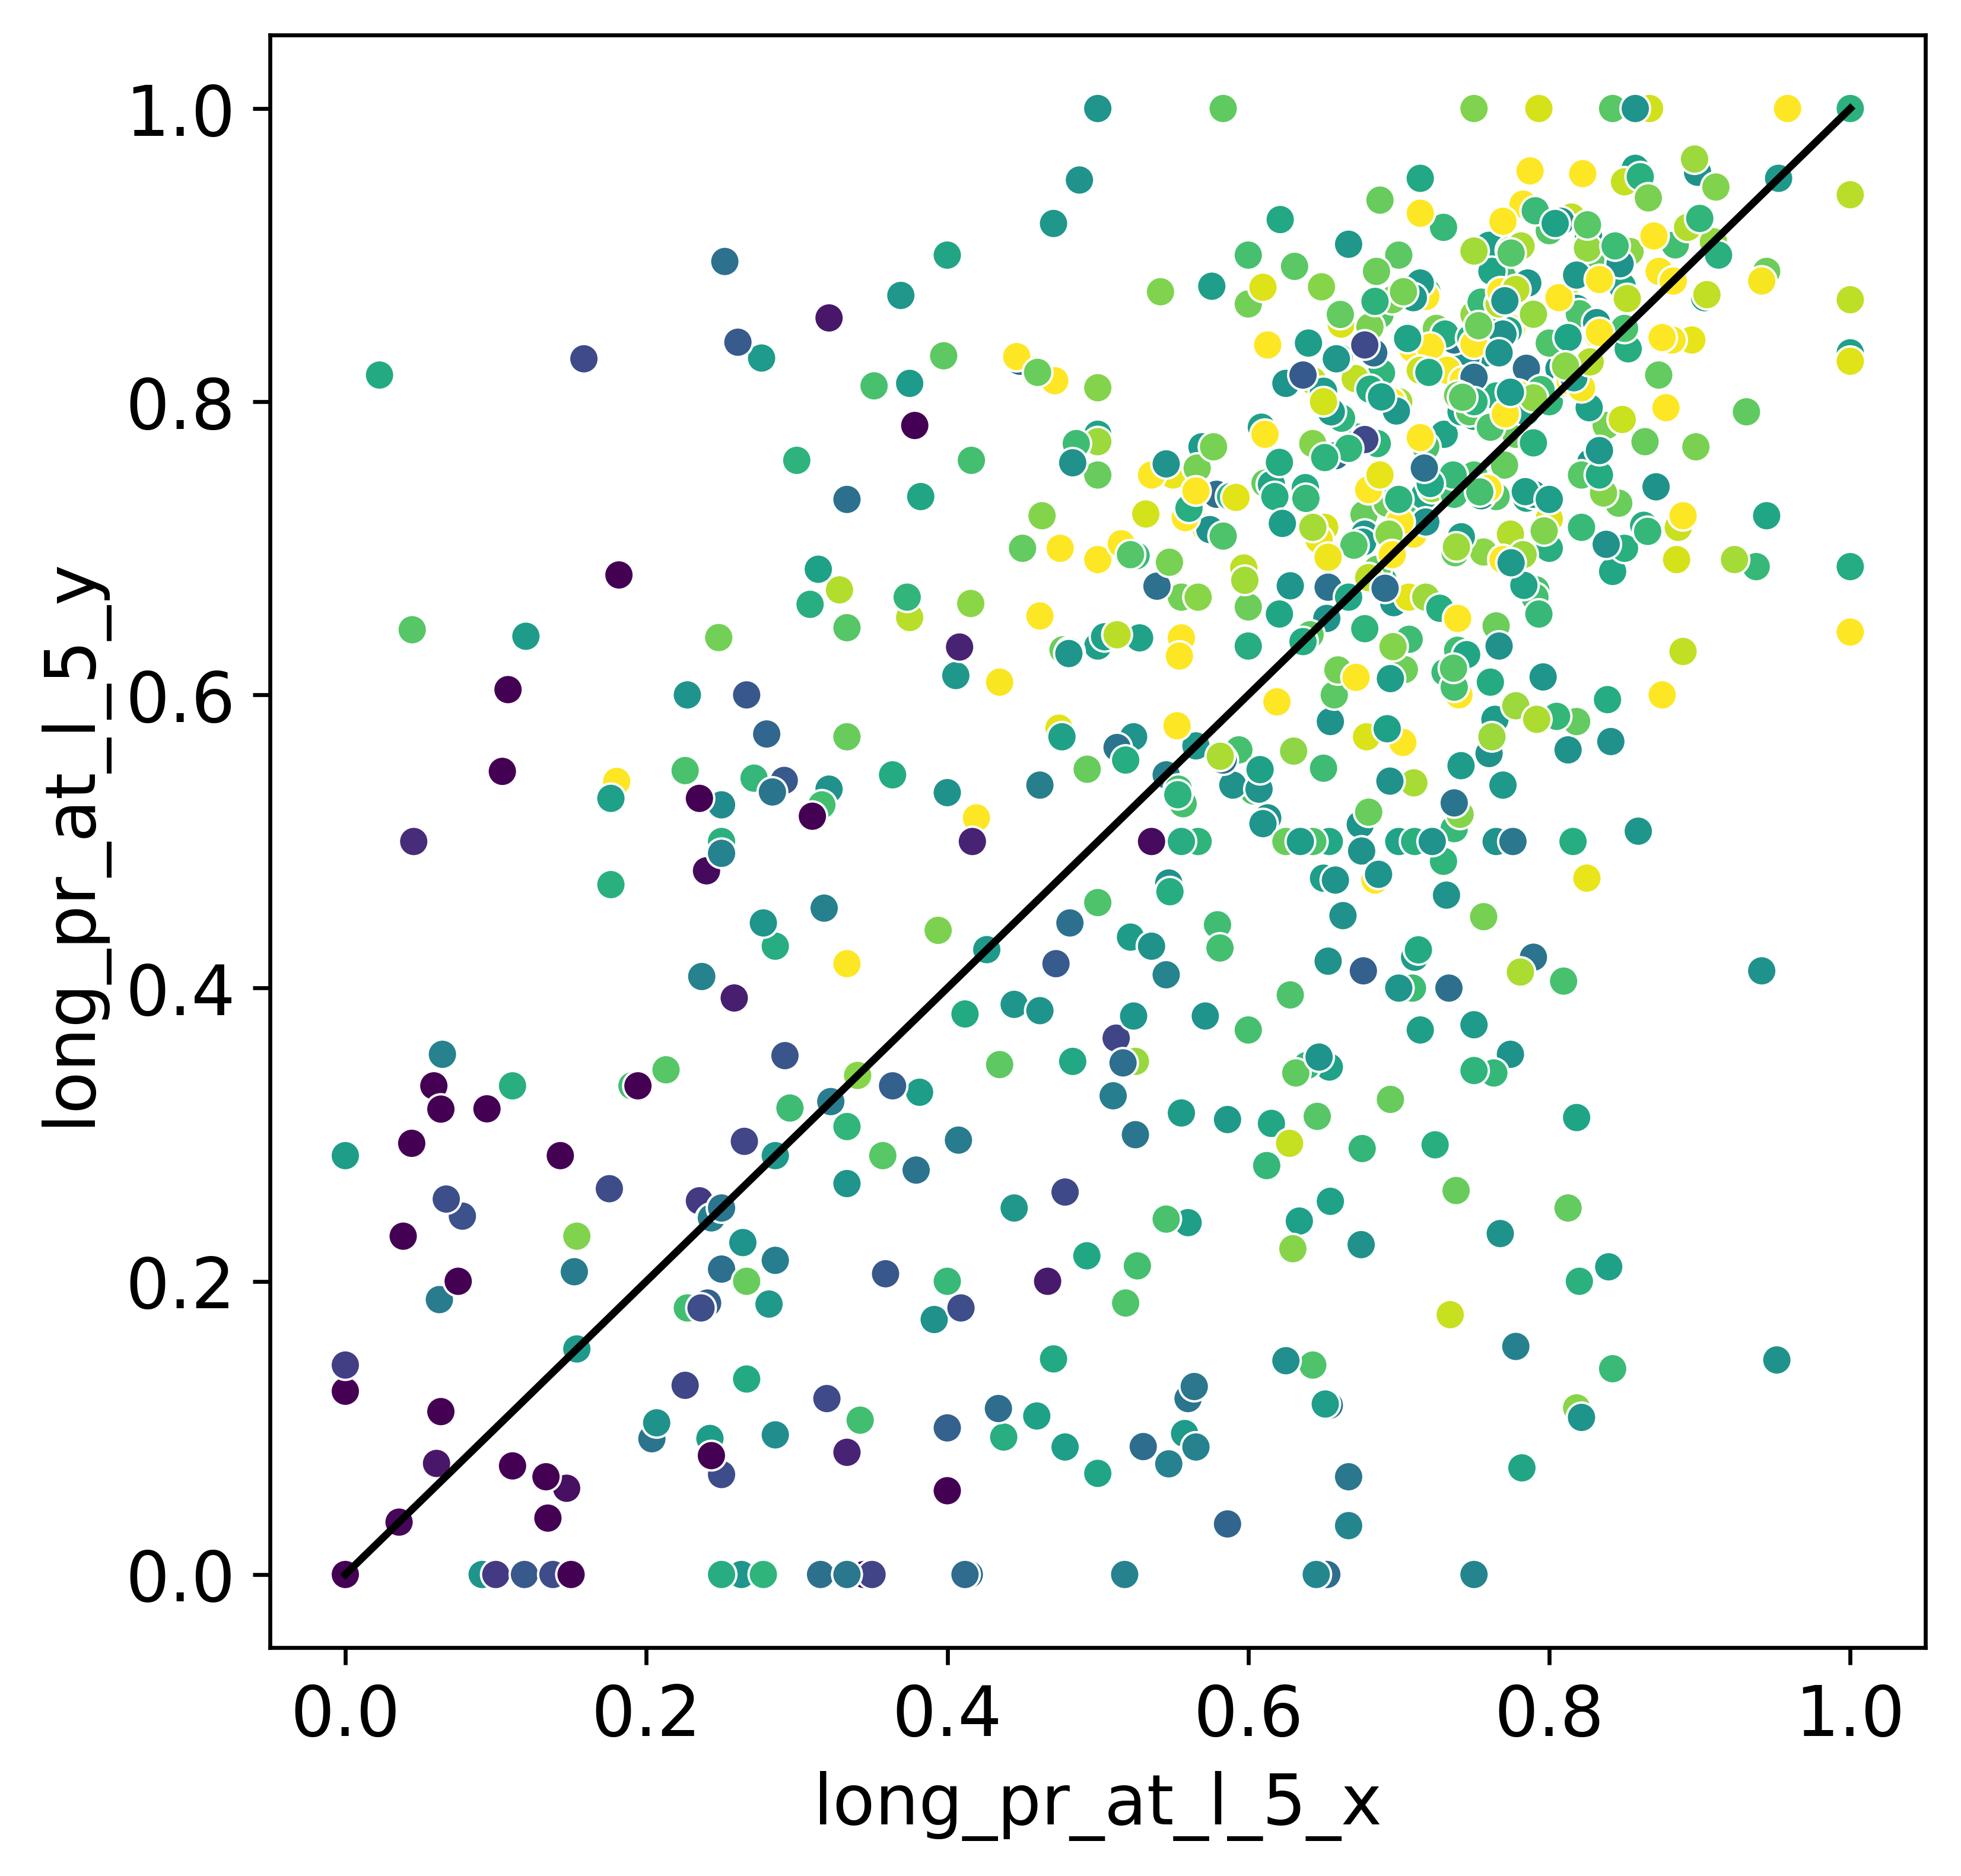

In [29]:
from matplotlib.colors import LogNorm

plt.figure(figsize=(6, 6), dpi=600)
sns.scatterplot(x='long_pr_at_l_5_x', 
                y='long_pr_at_l_5_y', 
                hue='num_seqs_x', 
                data=merged_df, 
                legend=False, 
                palette='viridis',
                hue_norm=LogNorm(200, 20000))
plt.plot([0, 1], [0, 1], c="k")

In [30]:
for key in ['long_pr_at_l_5_x', 'long_pr_at_l_5_y', 'long_pr_at_l_2_x', 'long_pr_at_l_2_y']:
    print(merged_df[key].median())

0.6538461446762085
0.6571316719055176
0.5
0.48650121688842773


In [ ]:
# gremlin vs fatt
gremnum_df = grem_df.copy()
gremnum_df['num_attention_heads'] = 1024
gremfatt_df = pd.concat([fatt_df, gremnum_df])

plt.figure(figsize = (6, 6/3), dpi=600)
melted_df = pd.melt(gremfatt_df, id_vars=['num_attention_heads'], value_vars=['short_pr_at_l', 'medium_pr_at_l', 'long_pr_at_l'])

g = sns.catplot(x="variable", 
                y="value", 
                hue="num_attention_heads",
                data=melted_df, 
                kind="box",
                height=10, 
                aspect=2)
plt.title('Stratified Precision at L')
g._legend.set_title('')
g.set_xticklabels(['Short [6, 12]', 'Medium [13, 24]', r'Long $\geq 25$'])
plt.ylabel('Precision at L')
plt.xlabel('Contact Range')

new_labels = [str(x) for x in [8, 16, 32, 64, 128, 256, 512]] + ['Potts']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
plt.ylim([0, 1])
plt.savefig('stratified_precision_head_sweep_p_at_l.pdf', dpi=600, bbox_inches="tight")

In [ ]:
# gremlin vs fatt
gremnum_df = grem_df.copy()
gremnum_df['num_attention_heads'] = 1024
gremfatt_df = pd.concat([fatt_df, gremnum_df])

plt.figure(figsize = (6, 6/3), dpi=600)
melted_df = pd.melt(gremfatt_df, id_vars=['num_attention_heads'], value_vars=['short_pr_at_l_5', 'medium_pr_at_l_5', 'long_pr_at_l_5'])

g = sns.catplot(x="variable", 
                y="value", 
                hue="num_attention_heads",
                data=melted_df, 
                kind="box",
                height=10, 
                aspect=2)
plt.title('Stratified Precision at L/5')
g._legend.set_title('')
g.set_xticklabels(['Short [6, 12]', 'Medium [13, 24]', r'Long $\geq 25$'])
plt.ylabel('Precision at L')
plt.xlabel('Contact Range')

new_labels = [str(x) for x in [8, 16, 32, 64, 128, 256, 512]] + ['Potts']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
plt.ylim([0, 1])
plt.savefig('stratified_precision_head_sweep_p_at_l_5.pdf', dpi=600, bbox_inches="tight")